In [2]:
import pathlib as pl
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mahotas
%matplotlib inline

In [68]:
# Size for large photo displays; halve for small/side-by-side photos
# Ratio for photos is 5:3
# plt.rcParams['figure.figsize'] = (30, 50)
plt.rcParams['figure.figsize'] = (40, 24)

For the first step of the Build phase, I will examine the photos for quality and consistency to ensure I can perform all image processing required for computer vision and photogrammetry operations. This includes:
* Examining image matrix operations
* Setting up a calibration collection



In [4]:
original_main = [str(photo) for photo in sorted(pl.Path('../data/original_main').glob('*.jpg'))]
original_midspan = [str(photo) for photo in sorted(pl.Path('../data/original_midspan').glob('*.jpg'))]
annotated_main = [str(photo) for photo in sorted(pl.Path('../data/annotated_main').glob('*.jpg'))]
annotated_midspan = [str(photo) for photo in sorted(pl.Path('../data/annotated_midspan').glob('*.jpg'))]

In [66]:
sample_midspan = cv2.imread(original_midspan[2])
sample_midspan_gray = cv2.cvtColor(sample_midspan, cv2.COLOR_BGR2GRAY)
sample_midspan_blurred = cv2.GaussianBlur(sample_midspan_gray, (15, 15), 0)

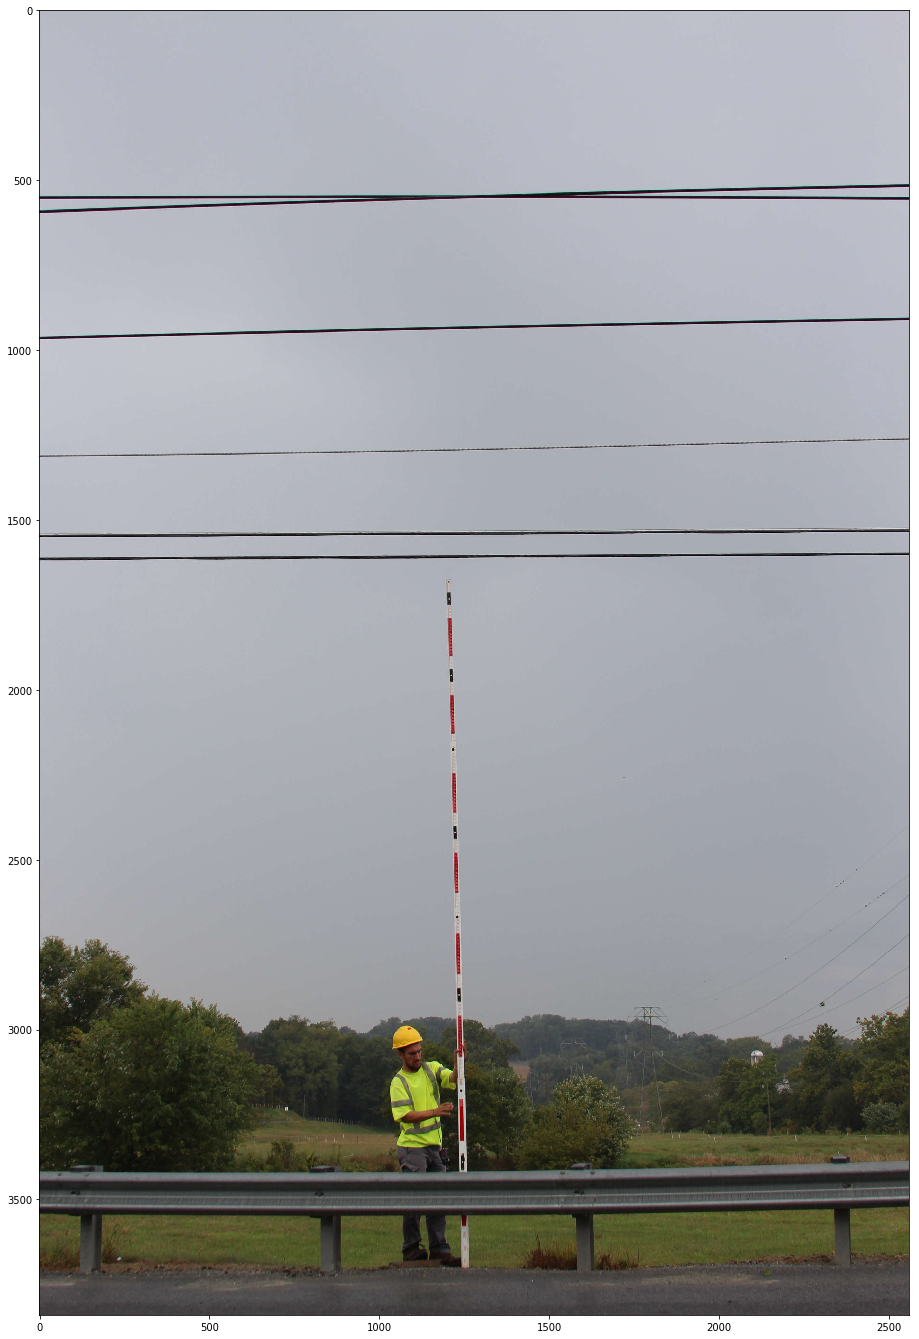

In [67]:
_ = plt.imshow(cv2.cvtColor(sample_midspan, cv2.COLOR_BGR2RGB))

## Edge Detection

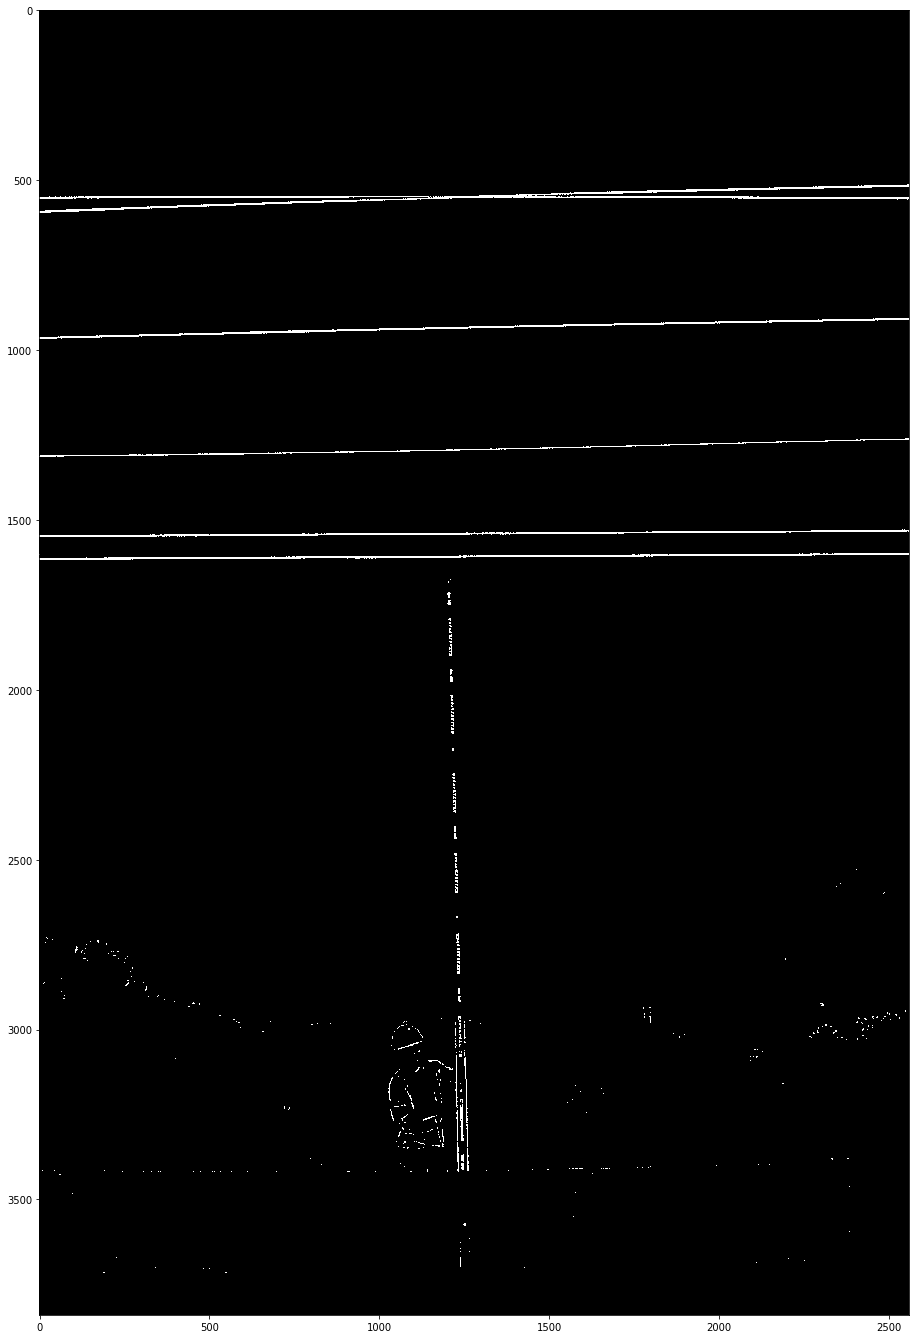

In [71]:
thresh = cv2.adaptiveThreshold(sample_midspan_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 2)
_ = plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))

1046


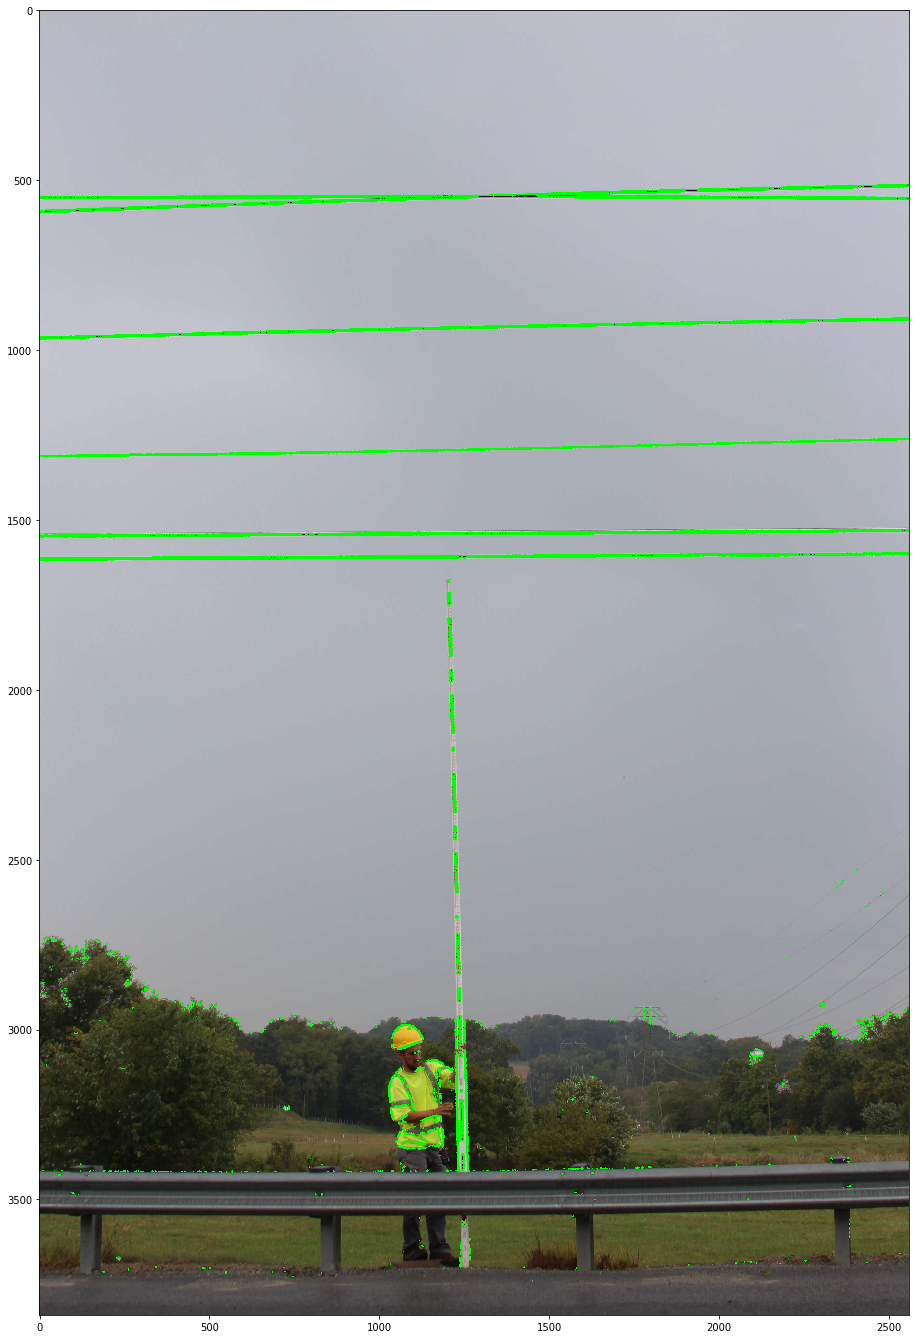

In [69]:
(_, cnts, _) = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))
cv2.drawContours(sample_midspan, cnts, -1, (0, 255, 0), 3)
_ = plt.imshow(cv2.cvtColor(sample_midspan, cv2.COLOR_BGR2RGB))

63


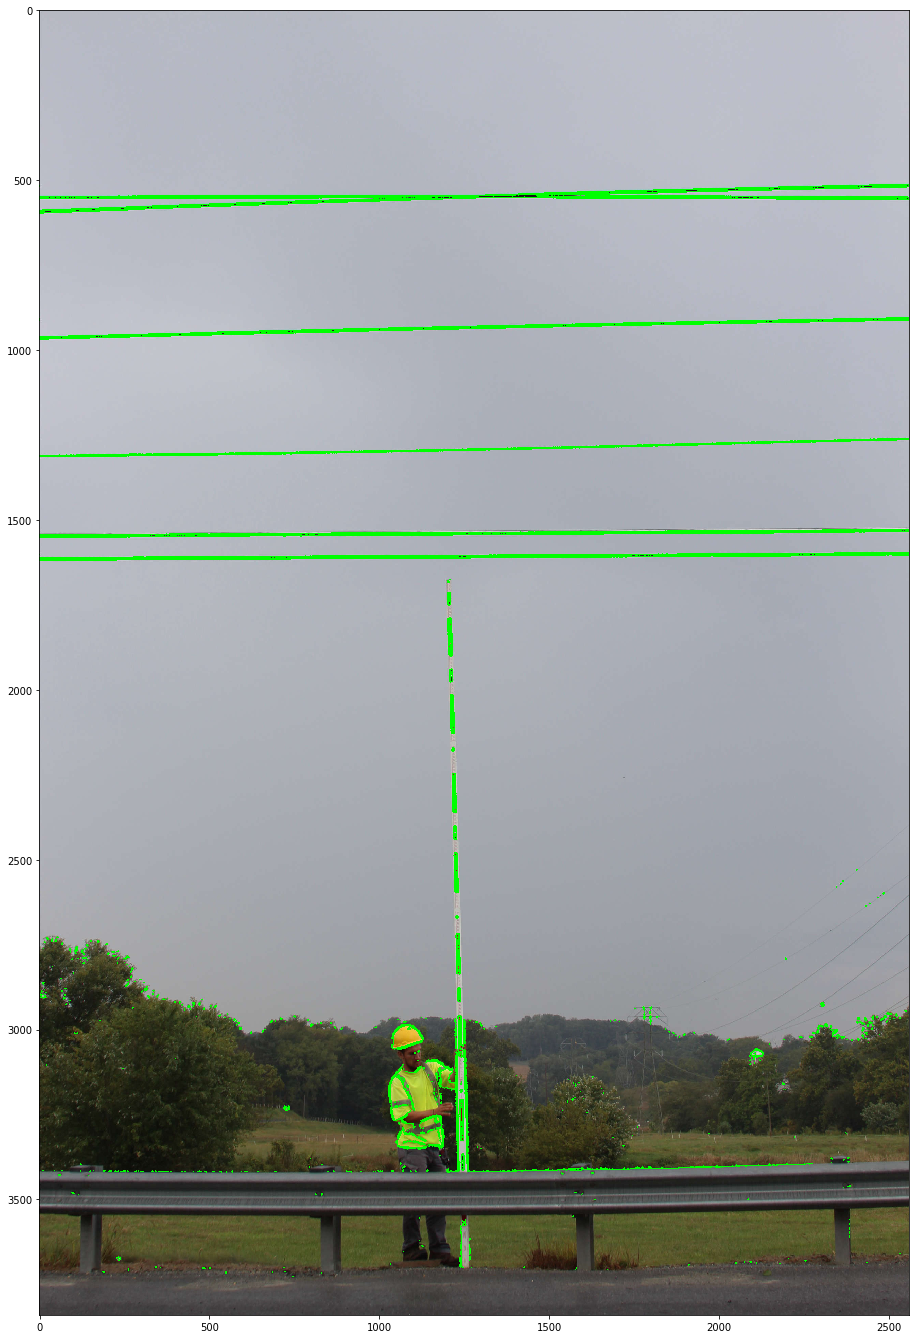

In [70]:
edged = cv2.Canny(sample_midspan_blurred, 30, 150)
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))
sample_copy = sample_midspan.copy()
cv2.drawContours(sample_copy, cnts, -1, (0, 255, 0), 2)
_ = plt.imshow(cv2.cvtColor(sample_copy, cv2.COLOR_BGR2RGB))